In [3]:
# **Import modules**
!pip install scikit-learn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string 
import nltk
import os
import logging
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Setup logging
output_dir = os.path.join(os.getcwd(), "RESULT")
os.makedirs(output_dir, exist_ok=True)
logging.basicConfig(filename=os.path.join(output_dir, 'genre_classifier.log'),
                   level=logging.INFO,
                   format='%(asctime)s - %(levelname)s - %(message)s')

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


=== Train Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None

=== Test Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None

=== Train Data Description ===
                  ID                           TITLE    GENRE  \
count   54214.000000                           54214    54214   
unique       

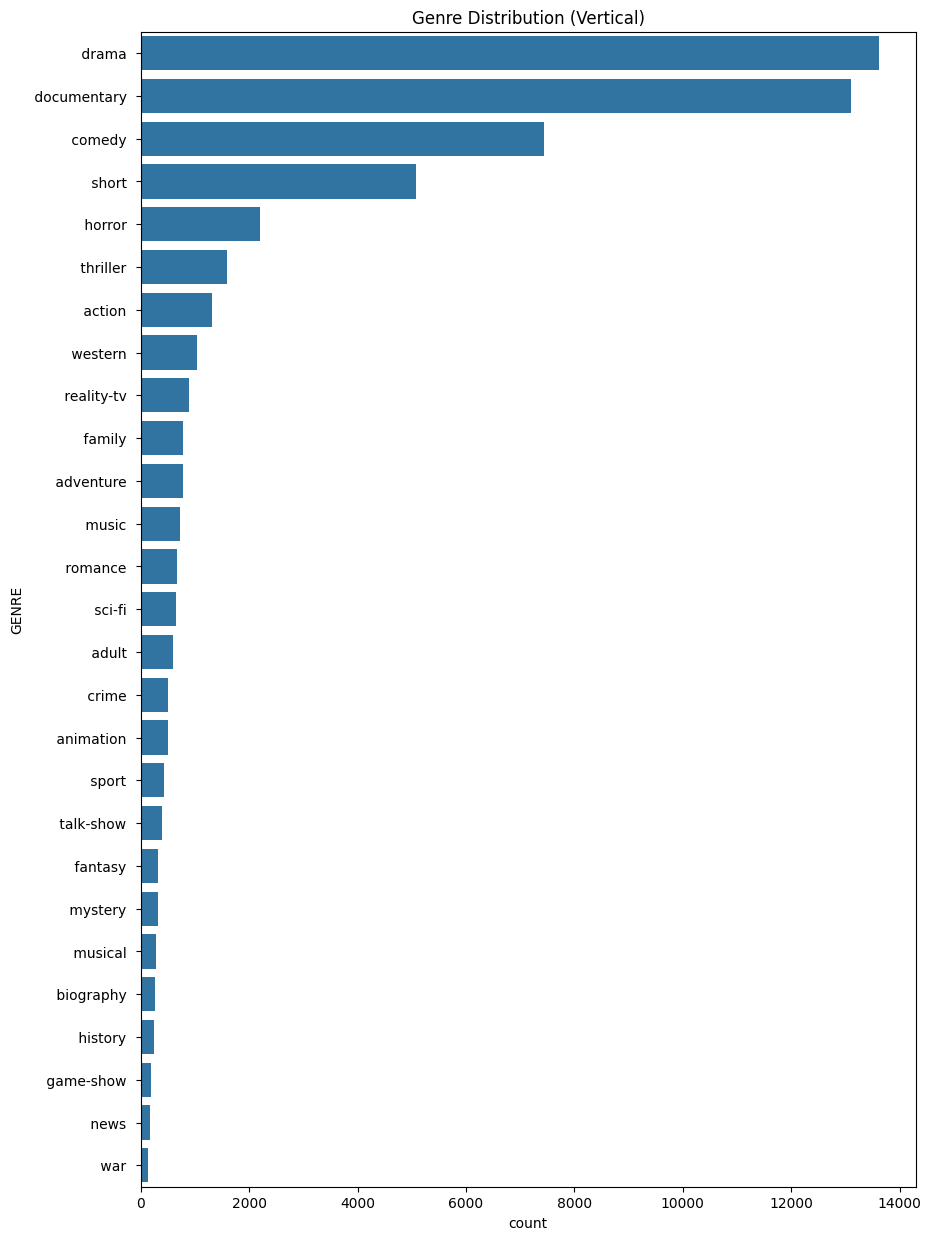

C:\Users\User\AppData\Local\Temp\ipykernel_28604\2008144021.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="GENRE", order=train_data["GENRE"].value_counts().index, palette="YlGnBu")


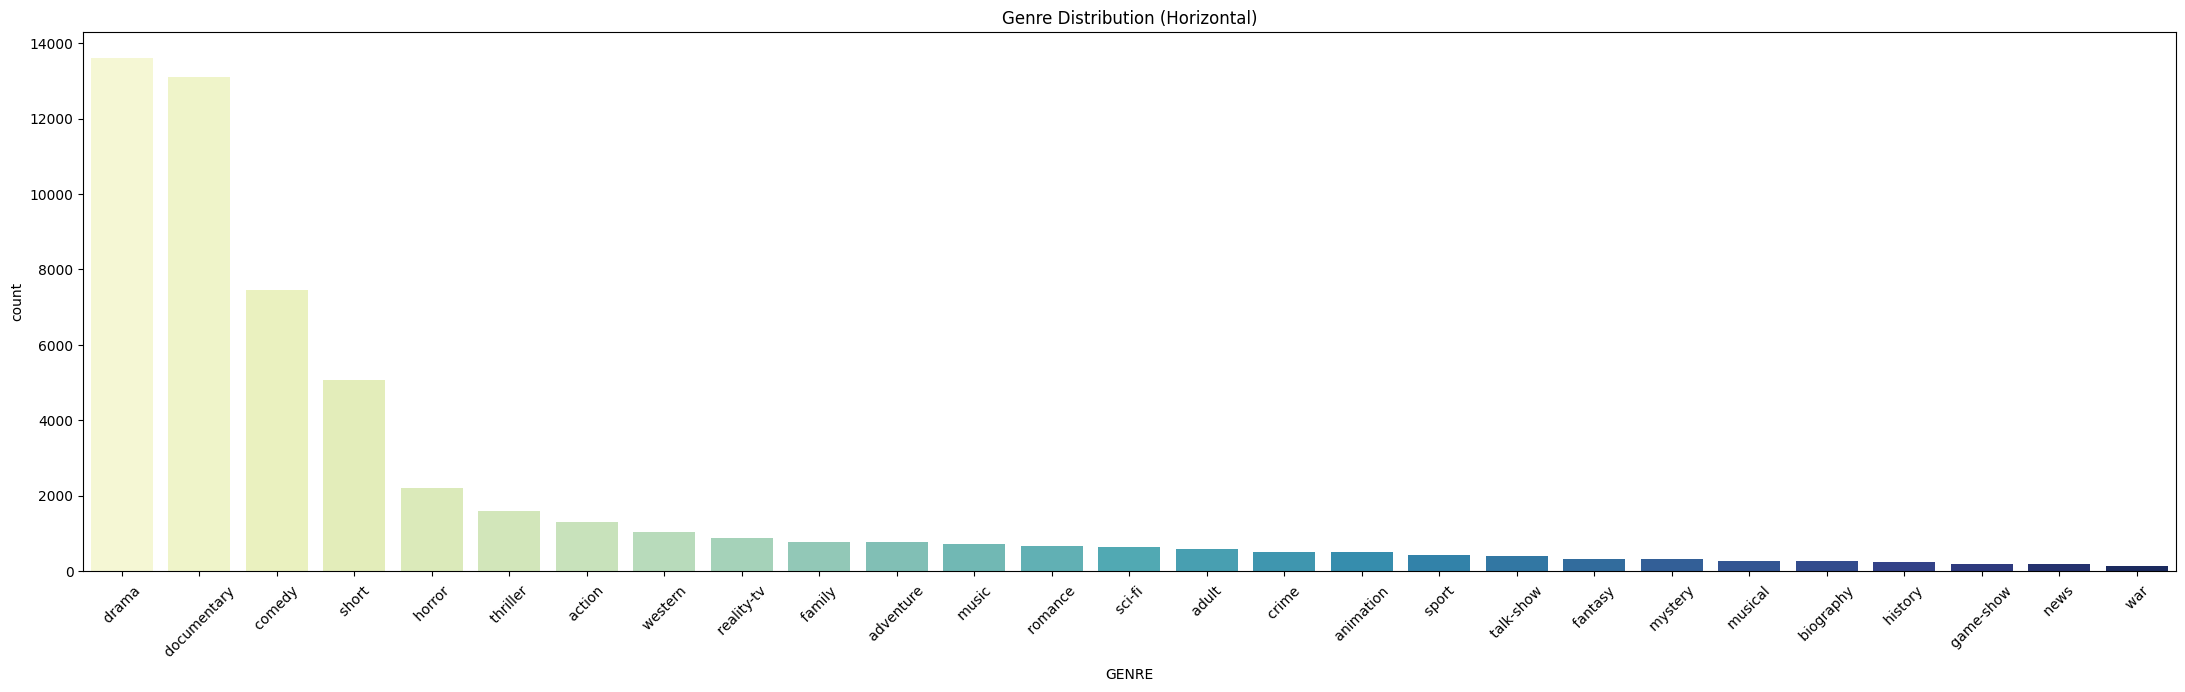

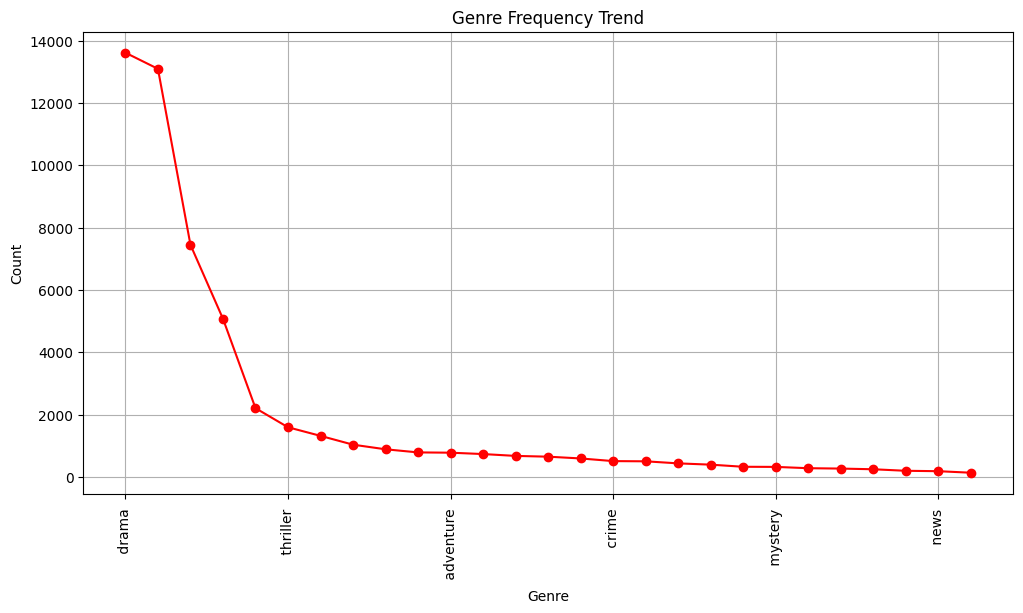


=== Sample Training Data ===


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
# **Read data with correct paths**
train_path = os.path.join("Genre Classification Dataset/train_data.txt")
test_path = os.path.join("Genre Classification Dataset/test_data.txt")

train_data = pd.read_csv(train_path, sep=":::", names=["ID", "TITLE", "GENRE", "DESCRIPTION"], engine="python")
test_data = pd.read_csv(test_path, sep=":::", names=["ID", "TITLE", "DESCRIPTION"], engine="python")

logging.info(f"Loaded {len(train_data)} training samples and {len(test_data)} test samples")

# Data Exploration
print("=== Train Data Info ===")
print(train_data.info())
print("\n=== Test Data Info ===")
print(test_data.info())

print("\n=== Train Data Description ===")
print(train_data.describe(include='all'))
print("\n=== Test Data Description ===")
print(test_data.describe(include='all'))

# Genre Distribution Visualizations
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order=train_data["GENRE"].value_counts().index)
plt.title("Genre Distribution (Vertical)")
plt.show()

plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order=train_data["GENRE"].value_counts().index, palette="YlGnBu")
plt.title("Genre Distribution (Horizontal)")
plt.xticks(rotation=45)
plt.show()

# Line curve plot of genre frequency
genre_counts = train_data['GENRE'].value_counts()
plt.figure(figsize=(12,6))
genre_counts.plot(kind='line', marker='o', color='Red')
plt.title('Genre Frequency Trend')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Display sample data
print("\n=== Sample Training Data ===")
train_data.head()

In [5]:
# **Data Preprocessing**
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(i) for i in words if i not in stop_words and len(i) > 2]
    return " ".join(words)

train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(clean_text)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(clean_text)
logging.info("Completed text cleaning")

SVC:
  Training Accuracy: 0.7268
  Validation Accuracy: 0.5856
MultinomialNB:
  Training Accuracy: 0.5370
  Validation Accuracy: 0.5094


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression:
  Training Accuracy: 0.6445
  Validation Accuracy: 0.5765
RandomForest:
  Training Accuracy: 0.9996
  Validation Accuracy: 0.5142

Model Comparison:
             Model  Train Accuracy  Validation Accuracy
               SVC        0.726753             0.585631
     MultinomialNB        0.537018             0.509361
LogisticRegression        0.644532             0.576501
      RandomForest        0.999608             0.514157


C:\Users\User\AppData\Local\Temp\ipykernel_28604\1321927409.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Validation Accuracy', y='Model', palette='viridis')


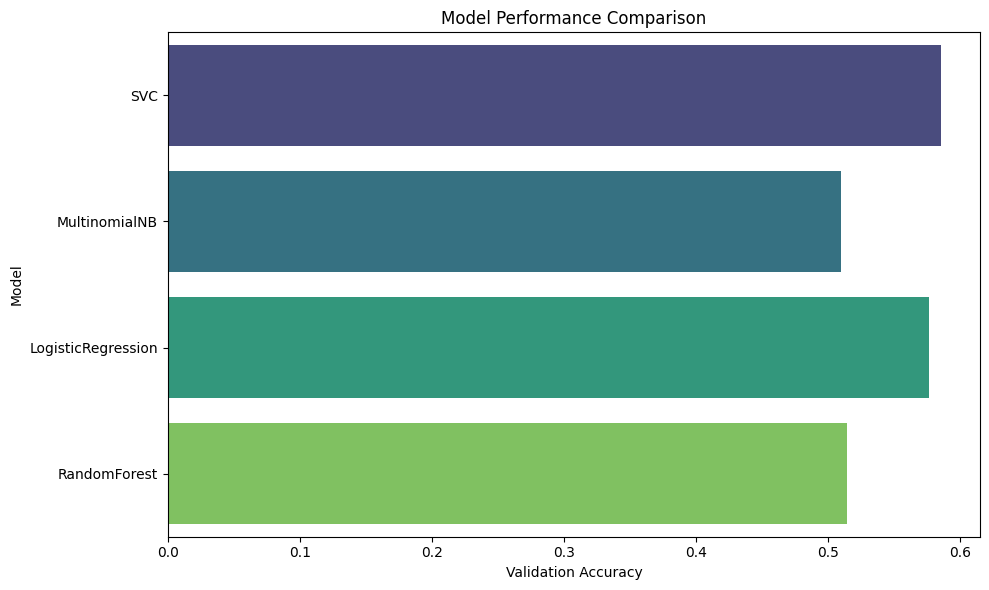

In [6]:
# **Vectorize and train models**
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data["TextCleaning"])
y_train = train_data["GENRE"]

# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train and compare multiple models
models = {
    "SVC": SVC(kernel='linear', probability=True),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(multi_class='ovr', max_iter=1000),
    "RandomForest": OneVsRestClassifier(RandomForestClassifier(n_estimators=50)),
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)
    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Validation Accuracy": val_acc
    })
    print(f"{name}:")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Validation Accuracy: {val_acc:.4f}")
    logging.info(f"{name} Training Accuracy: {train_acc:.4f}")
    logging.info(f"{name} Validation Accuracy: {val_acc:.4f}")

# Display results
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.to_string(index=False)) 

plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Validation Accuracy', y='Model', palette='viridis')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'model_comparison.png'))
plt.show()

In [7]:
# **Make predictions with best model**
# Using LogisticRegression as default (can be changed to best performing model)
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
X_test = vectorizer.transform(test_data['TextCleaning'])
test_preds = best_model.predict(X_test)
test_data['PREDICTED_GENRE'] = test_preds

# Save predictions with absolute path
output_path = os.path.join(output_dir, "test_predictions.csv")
test_data["PREDICTED_GENRE"] = test_preds
test_data[['ID', 'TITLE', 'PREDICTED_GENRE']].to_csv(output_path, index=False)
print(f"Predictions saved to {output_path}")
logging.info(f"Predictions saved to: {output_path}")

# Show sample predictions
test_data[['ID', 'TITLE', 'PREDICTED_GENRE']].head()

Predictions saved to c:\Users\User\Desktop\CODSOFT\CODSOFT_01\RESULT\test_predictions.csv


,ID,TITLE,PREDICTED_GENRE
0,1,Edgar's Lunch (1998),drama
1,2,La guerra de papá (1977),drama
2,3,Off the Beaten Track (2010),documentary
3,4,Meu Amigo Hindu (2015),drama
4,5,Er nu zhai (1955),drama
